In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
df = pd.read_csv("dataset/minimum_wage.csv")

In [4]:
act_min_wage = pd.DataFrame()

In [5]:
for name, group in df.groupby("State"):
    if act_min_wage.empty:
        act_min_wage = group.set_index("Year")[["Low.2018"]].rename(columns = {"Low.2018":name})
    else:
        act_min_wage = act_min_wage.join(group.set_index("Year")[["Low.2018"]].rename(columns = {"Low.2018":name}))
        

In [6]:
act_min_wage.head()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Federal (FLSA),...,Tennessee,Texas,U.S. Virgin Islands,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Year,,,,,,,,,,,,,,,,,,,,,
1968,0.0,15.12,3.37,1.12,11.88,7.20,10.08,9.00,9.00,8.28,...,0.0,0.00,NaN,7.20,10.08,0.0,11.52,7.20,9.00,8.64
1969,0.0,14.33,3.19,1.07,11.26,6.83,9.56,8.53,8.53,7.85,...,0.0,0.00,NaN,6.83,9.56,0.0,10.92,6.83,8.53,8.19
1970,0.0,13.54,3.02,7.09,10.64,6.45,10.32,8.06,10.32,8.38,...,0.0,0.00,NaN,6.45,10.32,0.0,10.32,6.45,8.38,8.38
1971,0.0,12.99,2.89,6.80,10.20,6.18,9.89,7.73,9.89,8.04,...,0.0,0.00,NaN,6.18,9.89,0.0,9.89,6.18,8.04,8.04
1972,0.0,12.57,2.80,7.19,9.88,5.99,11.08,9.58,9.58,9.58,...,0.0,8.38,NaN,7.19,9.58,0.0,9.58,7.19,8.68,8.98


In [7]:
min_wage_corr = act_min_wage.replace(0, np.NaN).dropna(axis=1).corr()

In [8]:
min_wage_corr.head()

,Alaska,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Federal (FLSA),Guam,Hawaii,...,Pennsylvania,Puerto Rico,Rhode Island,South Dakota,Utah,Vermont,Washington,West Virginia,Wisconsin,Wyoming
Alaska,1.000000,-0.377934,0.717653,-0.129332,0.680886,0.258997,0.321785,0.637679,0.787915,0.672620,...,0.610814,-0.038118,0.652353,-0.326316,-0.020462,0.663558,0.411593,0.044814,0.702570,0.727932
Arkansas,-0.377934,1.000000,-0.234367,0.135749,0.047580,0.016125,0.266889,0.117245,0.039593,0.204801,...,0.159923,0.232186,0.003498,0.800116,0.194680,0.087429,-0.072343,0.420819,0.000470,-0.250592
California,0.717653,-0.234367,1.000000,0.483313,0.876215,0.479197,0.596865,0.371966,0.492052,0.519241,...,0.429061,0.512712,0.780916,-0.036787,0.392898,0.877922,0.754085,0.371765,0.584067,0.722617
Colorado,-0.129332,0.135749,0.483313,1.000000,0.402020,0.566304,0.673371,-0.232035,-0.192616,0.069800,...,-0.136195,0.657364,0.429852,0.399137,0.622330,0.448485,0.612637,0.533623,0.011501,0.130053
Connecticut,0.680886,0.047580,0.876215,0.402020,1.000000,0.552613,0.652488,0.487750,0.632073,0.621503,...,0.531769,0.626712,0.802485,0.105707,0.302538,0.898469,0.715691,0.400099,0.585790,0.814971


In [9]:
import matplotlib.pyplot as plt

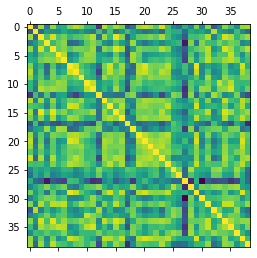

In [10]:
plt.matshow(min_wage_corr)

In [11]:
import matplotlib.pyplot as plt
labels = [c[:2] for c in min_wage_corr.columns]

In [12]:
fig = plt.figure(figsize = (12,12))

<Figure size 864x864 with 0 Axes>

In [13]:
ax = fig.add_subplot(111)

In [20]:
ax.matshow(min_wage_corr, cmap = plt.cm.RdYlBu)
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
plt.show()

In [21]:
import pandas as pd
dfs = pd.read_html("https://www.infoplease.com/state-abbreviations-and-state-postal-codes")

In [22]:
for df in dfs:
    print(df)

          State/District Abbreviation Postal Code
0                Alabama         Ala.          AL
1                 Alaska       Alaska          AK
2                Arizona        Ariz.          AZ
3               Arkansas         Ark.          AR
4             California       Calif.          CA
5               Colorado        Colo.          CO
6            Connecticut        Conn.          CT
7               Delaware         Del.          DE
8   District of Columbia         D.C.          DC
9                Florida         Fla.          FL
10               Georgia          Ga.          GA
11                Hawaii       Hawaii          HI
12                 Idaho        Idaho          ID
13              Illinois         Ill.          IL
14               Indiana         Ind.          IN
15                  Iowa         Iowa          IA
16                Kansas        Kans.          KS
17              Kentucky          Ky.          KY
18             Louisiana          La.          LA


In [24]:
state_abbv = dfs[0]
state_abbv

,State/District,Abbreviation,Postal Code
0,Alabama,Ala.,AL
1,Alaska,Alaska,AK
2,Arizona,Ariz.,AZ
3,Arkansas,Ark.,AR
4,California,Calif.,CA
5,Colorado,Colo.,CO
6,Connecticut,Conn.,CT
7,Delaware,Del.,DE
8,District of Columbia,D.C.,DC
9,Florida,Fla.,FL


In [32]:
state_abbv.to_csv("dataset/state_abbv.csv", index = False)

In [33]:
state_abbv = pd.read_csv("dataset/state_abbv.csv", index_col = 0)

In [34]:
state_abbv

,Abbreviation,Postal Code
State/District,,
Alabama,Ala.,AL
Alaska,Alaska,AK
Arizona,Ariz.,AZ
Arkansas,Ark.,AR
California,Calif.,CA
Colorado,Colo.,CO
Connecticut,Conn.,CT
Delaware,Del.,DE
District of Columbia,D.C.,DC


In [35]:
abbv_dict = state_abbv[["Postal Code"]].to_dict()

In [36]:
abbv_dict = abbv_dict["Postal Code"]

In [37]:
abbv_dict

{'Alabama': 'AL',
 'Alaska': 'AK',
 'Arizona': 'AZ',
 'Arkansas': 'AR',
 'California': 'CA',
 'Colorado': 'CO',
 'Connecticut': 'CT',
 'Delaware': 'DE',
 'District of Columbia': 'DC',
 'Florida': 'FL',
 'Georgia': 'GA',
 'Hawaii': 'HI',
 'Idaho': 'ID',
 'Illinois': 'IL',
 'Indiana': 'IN',
 'Iowa': 'IA',
 'Kansas': 'KS',
 'Kentucky': 'KY',
 'Louisiana': 'LA',
 'Maine': 'ME',
 'Maryland': 'MD',
 'Massachusetts': 'MA',
 'Michigan': 'MI',
 'Minnesota': 'MN',
 'Mississippi': 'MS',
 'Missouri': 'MO',
 'Montana': 'MT',
 'Nebraska': 'NE',
 'Nevada': 'NV',
 'New Hampshire': 'NH',
 'New Jersey': 'NJ',
 'New Mexico': 'NM',
 'New York': 'NY',
 'North Carolina': 'NC',
 'North Dakota': 'ND',
 'Ohio': 'OH',
 'Oklahoma': 'OK',
 'Oregon': 'OR',
 'Pennsylvania': 'PA',
 'Rhode Island': 'RI',
 'South Carolina': 'SC',
 'South Dakota': 'SD',
 'Tennessee': 'TN',
 'Texas': 'TX',
 'Utah': 'UT',
 'Vermont': 'VT',
 'Virginia': 'VA',
 'Washington': 'WA',
 'West Virginia': 'WV',
 'Wisconsin': 'WI',
 'Wyoming': 'WY

In [39]:
abbv_dict["Federal (FLSA)"] = "FLSA"
abbv_dict["Guam"] = "GU"
abbv_dict["Puerto Rico"] = "PR"
labels = [abbv_dict[c] for c in min_wage_corr.columns]

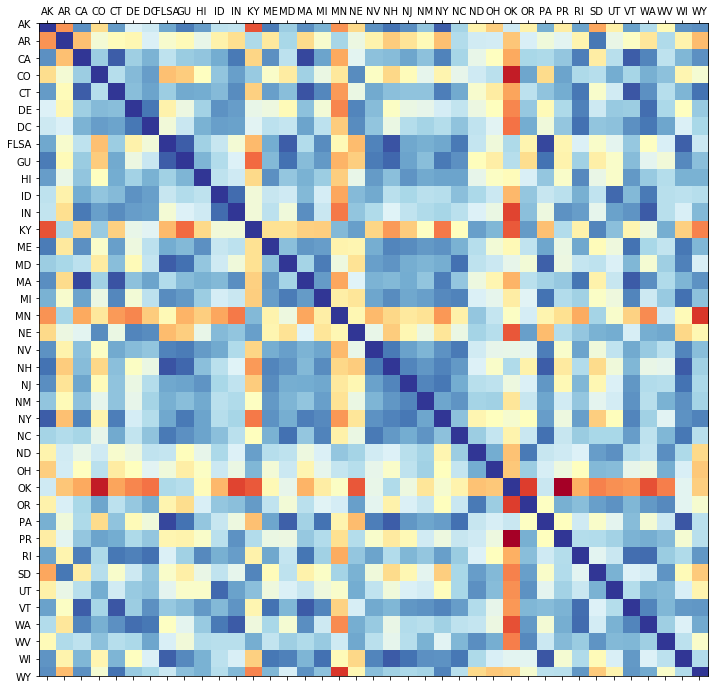

In [40]:
labels = [abbv_dict[c] for c in min_wage_corr.columns]
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111)
ax.matshow(min_wage_corr, cmap = plt.cm.RdYlBu)
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
plt.show()